In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 96s 1us/step


(50000, 32, 32, 3)

32*32 means matrix 32*32 and 3 means RGB   

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,) #-1 dont change the original value 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes=['airplane','automobile','bird',"cat","deer","dog","frog",'horse',"ship","truck"]

In [13]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

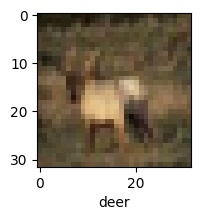

In [14]:
plot_sample(x_train,y_train,3)

In [15]:
#we need to normalize values that i need to convert 0,255 to 0,1
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
#after normalization 
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [17]:
x_train=x_train/255
x_test=x_test/255

Build simple artificial neural network for image classification

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 88s 55ms/step - loss: 1.8150 - accuracy: 0.3522
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6250 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.5437 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4825 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4330 - accuracy: 0.4978


In [20]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.5013 - accuracy: 0.4559


[1.5013489723205566, 0.45590001344680786]

You can see that at the end of 5 epochs, accuracy is at around 49%

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.42      0.51      1000
           1       0.73      0.39      0.51      1000
           2       0.40      0.28      0.33      1000
           3       0.36      0.32      0.34      1000
           4       0.48      0.25      0.33      1000
           5       0.50      0.27      0.35      1000
           6       0.34      0.81      0.48      1000
           7       0.70      0.39      0.50      1000
           8       0.43      0.80      0.56      1000
           9       0.45      0.64      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



Build Convolution neural network for image classification

In [23]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32,kernel_size=(3,3) ,activation="relu",input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=32,kernel_size=(3,3) ,activation="relu"),
        layers.MaxPooling2D((2,2)),
        
            
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [24]:
cnn.compile(optimizer='adam',
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy']
            )

In [25]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.4935 - accuracy: 0.4625
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1669 - accuracy: 0.5916
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0403 - accuracy: 0.6376
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9652 - accuracy: 0.6618
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9074 - accuracy: 0.6836
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8565 - accuracy: 0.7012
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8224 - accuracy: 0.7127
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7867 - accuracy: 0.7245
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7566 - accuracy: 0.7359
Epoch 10/10
1563/1563 [==============================] - 29s 18m

In [26]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9364 - accuracy: 0.6822


[0.9363968968391418, 0.682200014591217]

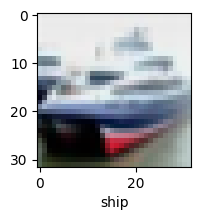

In [27]:
y_test=y_test.reshape(-1,)
plot_sample(x_test,y_test,1)

In [28]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[5.8489881e-04, 9.3022238e-05, 3.8420194e-04, 6.8315732e-01,
        8.0096557e-05, 2.6990643e-01, 4.2513527e-02, 7.2285925e-06,
        2.9352498e-03, 3.3805793e-04],
       [3.3084006e-04, 1.7136468e-02, 6.9483917e-08, 2.3216413e-07,
        1.2506179e-08, 1.0993573e-08, 2.3223199e-08, 4.0559280e-09,
        9.8189676e-01, 6.3563435e-04],
       [4.6859346e-02, 4.0160021e-01, 2.0972674e-03, 1.0141346e-02,
        6.0159940e-04, 5.6535349e-04, 5.2697503e-04, 1.3872705e-03,
        4.8749843e-01, 4.8722163e-02],
       [6.9310445e-01, 1.1971294e-03, 1.4402755e-02, 8.2479678e-03,
        3.4564871e-02, 8.7363046e-04, 2.1974244e-03, 8.7293127e-04,
        2.4270181e-01, 1.8370415e-03],
       [4.0282048e-06, 3.5754547e-06, 1.4616341e-02, 4.8084766e-02,
        4.5638862e-01, 4.6159159e-03, 4.7607359e-01, 2.4390567e-05,
        1.8798464e-04, 8.0374997e-07]], dtype=float32)

In [30]:
y_classes=[np.argmax(element) for element in y_pred ]
y_classes[:5]

[3, 8, 8, 0, 6]

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [32]:
classes[y_classes[1]]

'ship'

Exercice

In [35]:
(x_train, y_train) , (x_test, y_test) = datasets.mnist.load_data()

In [36]:
len(x_train)

60000

In [37]:
x_train[0].shape

(28, 28)

In [38]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [53]:
x_train.shape

(60000, 28, 28)

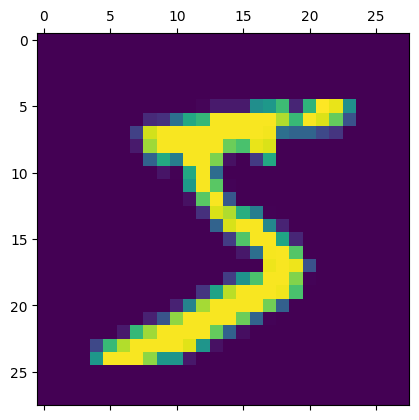

In [39]:
plt.matshow(x_train[0])

In [40]:
y_train[0]

5

In [41]:
#normalization
x_train = x_train / 255
x_test = x_test / 255

In [42]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [58]:
cnn2 = models.Sequential([
        #cnn
        layers.Conv2D(filters=30,kernel_size=(3,3) ,activation="relu",input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
            
        #dense
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax') 
])

In [59]:
cnn2.compile(optimizer='adam',
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy']
            )

In [60]:
cnn2.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1573 - accuracy: 0.9530
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0540 - accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0241 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0122 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [61]:
cnn2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9837


[0.07995215803384781, 0.9836999773979187]